In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
from scipy import stats
from math import sqrt
from statsmodels.tsa.stattools import acf
from matplotlib import pyplot as plt

In [2]:
sns.set_style('whitegrid')

In [3]:
elechis_df = pd.read_excel('C:\\Users\\ptopp\\Documents\\DATFiles\\exit polls.xlsx',sheet_name='Sheet1')
roper = elechis_df[elechis_df['Source'] == 'Roper']
gallup = elechis_df[elechis_df['Source'] == 'Gallup']

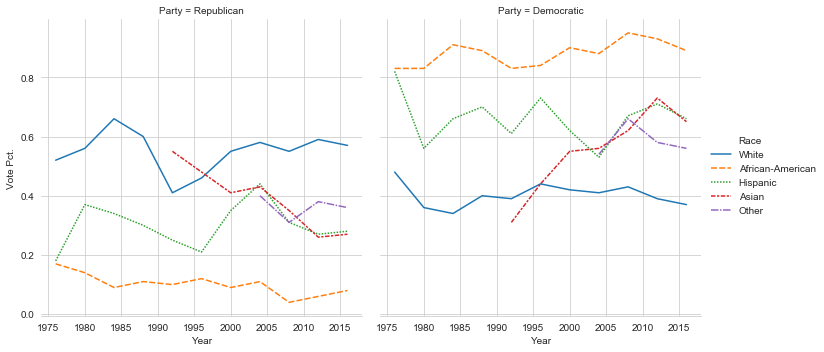

In [5]:
roperplot = sns.relplot(x='Year',y='Vote Pct.',kind='line',hue='Race',style='Race',data=roper,col='Party')
roperplot.despine(left=True)
roperplot.savefig('ropertimeseries.png')

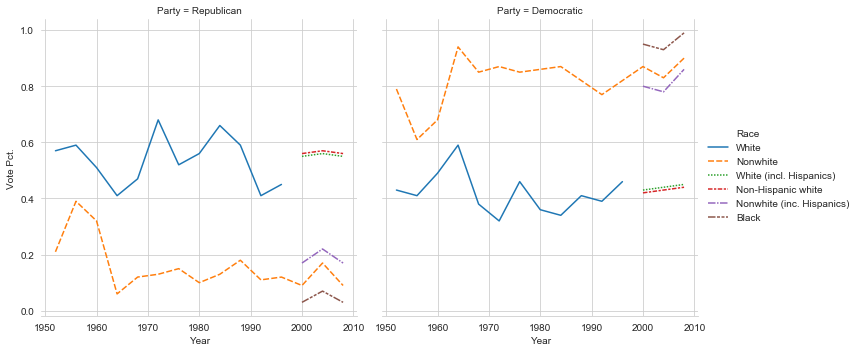

In [6]:
gallupplot = sns.relplot(x='Year',y='Vote Pct.',kind='line',hue='Race',style='Race',data=gallup,col='Party')
gallupplot.despine(left=True)
gallupplot.savefig('galluptimeseries.png')

C:\Users\ptopp\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\ptopp\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  del sys.path[0]
C:\Users\ptopp\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/

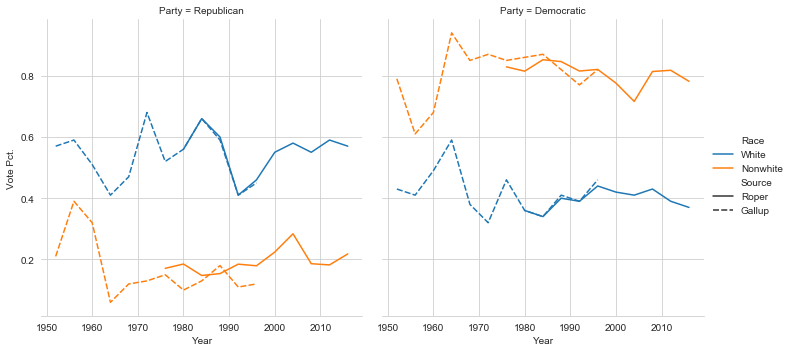

In [7]:
r1 = roper[roper['Race'] != 'White']
r1['inter'] = r1['Pct.'].multiply(r1['Vote Pct.'])
r2 = r1[r1['Party'] == 'Republican'].groupby('Year').sum()
r3 = r1.groupby('Year').sum()
r4 = r1.groupby(['Year','Party']).sum()
r5 = r4.merge(r3,left_index=True,right_index=True)
r5['Vote Pct.'] = r5['inter_x'] / r5['inter_y']
r5.rename(columns={'Pct._x' : 'Pct.'},inplace=True)
r5['Source'] = 'Roper'
r5['Race'] = 'Nonwhite'
r6 = r5[['Pct.','Vote Pct.','Source','Race']]
r7 = r6.xs('Democratic',level='Party')
r7['Party'] = 'Democratic'
r8 = r6.xs('Republican',level='Party')
r8['Party'] = 'Republican'
r9 = r7.append(r8)
r9 = r9.reset_index()
roper_trunc = roper[(roper['Year'] >= 1980) & (roper['Race'] == 'White')]
gallup_trunc = gallup[(gallup['Year'] <= 1996)]
merged_sample = roper_trunc.append(gallup_trunc)
merged_sample = merged_sample.append(r9.reset_index(drop=True))
mergeplot = sns.relplot(x='Year',y='Vote Pct.',kind='line',hue='Race',style='Source',data=merged_sample,col='Party')
mergeplot.despine(left=True)
mergeplot.savefig('combinedtimeseries.png')

C:\Users\ptopp\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


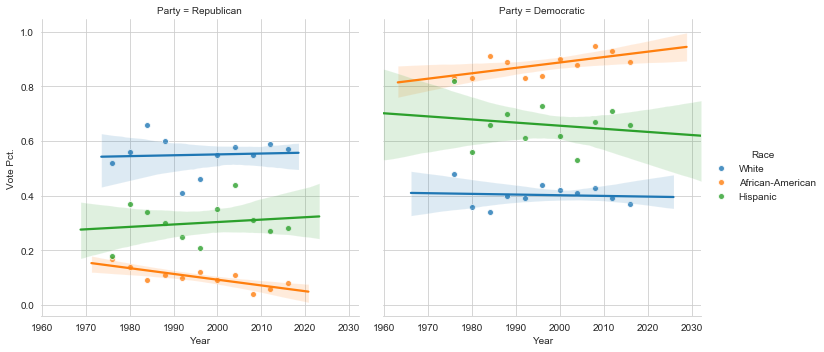

In [18]:
roper_race_samp = roper[(roper['Race'] == 'White') | (roper['Race'] == 'African-American') | (roper['Race'] == 'Hispanic')]
raceplot = sns.lmplot(x='Year',y='Vote Pct.',hue='Race',col='Party',data=roper_race_samp, scatter_kws={'edgecolors':'w', 'linewidth' : 1})
raceplot.despine(left=True)
raceplot.savefig('roper3racetimeseries.png')

In [19]:
whiterep = roper[(roper['Race'] == 'White') & (roper['Party'] == 'Republican')]
blackrep = roper[(roper['Race'] == 'African-American') & (roper['Party'] == 'Republican')]
hispanicrep = roper[(roper['Race'] == 'Hispanic') & (roper['Party'] == 'Republican')]
whitedem = roper[(roper['Race'] == 'White') & (roper['Party'] == 'Democratic')]
blackdem = roper[(roper['Race'] == 'African-American') & (roper['Party'] == 'Democratic')]
hispanicdem =roper[(roper['Race'] == 'Hispanic') & (roper['Party'] == 'Democratic')]
a_whiterep = {'acf': acf(whiterep['Vote Pct.'],unbiased=True), 'Race': 'White', 'Party': 'Republican'}
a_blackrep = {'acf':acf(blackrep['Vote Pct.'],unbiased=True), 'Race': 'African-American', 'Party': 'Republican'}
a_hispanicrep = {'acf': acf(hispanicrep['Vote Pct.'],unbiased=True), 'Race': 'Hispanic', 'Party': 'Republican'}
a_whitedem = {'acf': acf(whitedem['Vote Pct.'],unbiased=True), 'Race': 'White', 'Party': 'Democratic'}
a_blackdem = {'acf': acf(blackdem['Vote Pct.'],unbiased=True), 'Race': 'African-American', 'Party': 'Democratic'}
a_hispanicdem = {'acf': acf(hispanicdem['Vote Pct.'],unbiased=True), 'Race': 'Hispanic', 'Party': 'Democratic'}
results = [a_whiterep, a_blackrep, a_hispanicrep, a_whitedem, a_blackdem, a_hispanicdem]
results = [pd.DataFrame(d) for d in results]
results_df = pd.concat(results, sort=True).reset_index()

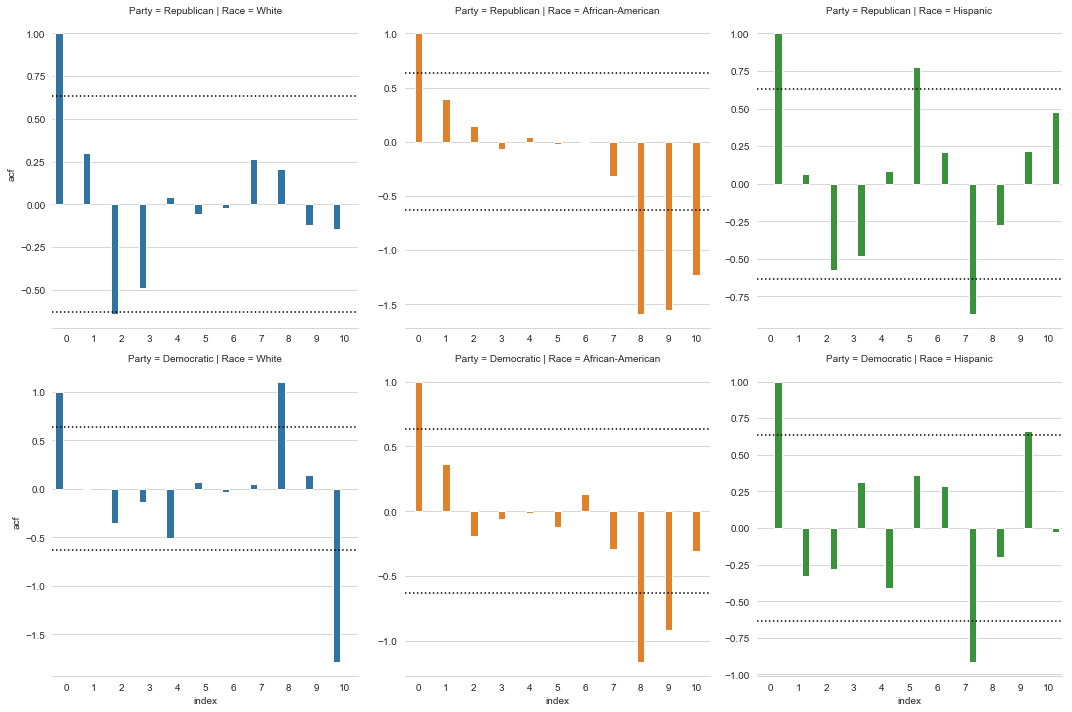

In [20]:
acfplot = sns.catplot(x='index', y='acf', data = results_df, col='Race', row='Party', kind='bar', ci=None, hue='Race', sharex=False, sharey=False)
acfplot.despine(left=True)
acfplot.axes[0,0].axhline(y=2/sqrt(len(whiterep)-1),color='black',linestyle='dotted')
acfplot.axes[0,0].axhline(y=-2/sqrt(len(whiterep)-1),color='black',linestyle='dotted')
acfplot.axes[0,1].axhline(y=2/sqrt(len(whiterep)-1),color='black',linestyle='dotted')
acfplot.axes[0,1].axhline(y=-2/sqrt(len(whiterep)-1),color='black',linestyle='dotted')
acfplot.axes[0,2].axhline(y=2/sqrt(len(whiterep)-1),color='black',linestyle='dotted')
acfplot.axes[0,2].axhline(y=-2/sqrt(len(whiterep)-1),color='black',linestyle='dotted')
acfplot.axes[1,0].axhline(y=2/sqrt(len(whiterep)-1),color='black',linestyle='dotted')
acfplot.axes[1,0].axhline(y=-2/sqrt(len(whiterep)-1),color='black',linestyle='dotted')
acfplot.axes[1,1].axhline(y=2/sqrt(len(whiterep)-1),color='black',linestyle='dotted')
acfplot.axes[1,1].axhline(y=-2/sqrt(len(whiterep)-1),color='black',linestyle='dotted')
acfplot.axes[1,2].axhline(y=2/sqrt(len(whiterep)-1),color='black',linestyle='dotted')
acfplot.axes[1,2].axhline(y=-2/sqrt(len(whiterep)-1),color='black',linestyle='dotted')
acfplot.savefig('acgplot.png')

C:\Users\ptopp\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


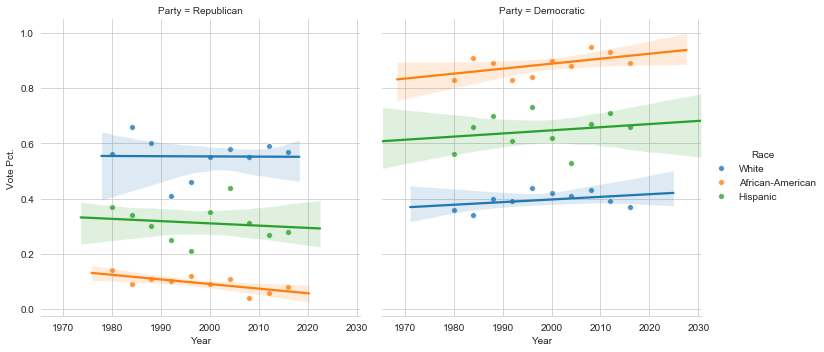

In [21]:
roper_race_trunc = roper_race_samp[roper_race_samp['Year'] >= 1980]
race_trunc_plot = sns.lmplot(x='Year',y='Vote Pct.',hue='Race',col='Party',data=roper_race_trunc, scatter_kws={'edgecolors':'w', 'linewidth':1})
race_trunc_plot.despine(left=True)
race_trunc_plot.savefig('roper3racetimeseriestrunc.png')

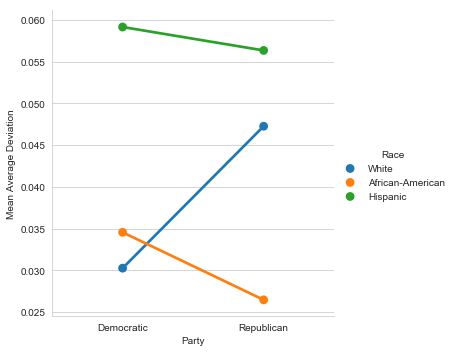

In [22]:
var = pd.DataFrame({'Party':['Democratic','Democratic','Democratic','Republican','Republican','Republican'],'Race':['White','African-American','Hispanic','White','African-American','Hispanic'],
	'Mean Average Deviation':[whitedem['Vote Pct.'].mad(),blackdem['Vote Pct.'].mad(),hispanicdem['Vote Pct.'].mad(),whiterep['Vote Pct.'].mad(),blackrep['Vote Pct.'].mad(),hispanicrep['Vote Pct.'].mad()]})
varplot = sns.catplot(x='Party',y='Mean Average Deviation',data=var,kind='point',hue='Race')
varplot.savefig('madplot.png')